In [1]:
from core import *
from utils import *
from diagnostics import *
from fields import *
from constants import *
from distributions import *

from scipy import constants as sp
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import njit

Load IGRF coefficients ...


In [2]:
e_field = zero_field() # uniform_field(1e-4, np.array([0., 1., 0.]))
b_field = t89(1)
solve   = solver(relativistic_boris(e_field, b_field))

In [23]:
import scipy.constants as sp

rr = field_line(b_field, np.array([-12 * Re, 0, 0]), 1e1)
adp = np.zeros((len(rr)))

K = 1e6

def gamma_from_E(K, m):
    return 1 + K / (m * sp.c**2)

def v_rel(g):
    return (sp.c / g) * sqrt(g**2 - 1)

for i, r in enumerate(rr):
    b = b_field(r)
    
    v = v_rel(gamma_from_E(eV_to_J(K), sp.m_e))
    v_vec = np.array([v, 0, 0])
    rho_0 = gamma(v_vec) * sp.m_e * np.linalg.norm(v) / (abs(-sp.e) * np.linalg.norm(b))
    
    R_c = flc(b_field, r)
    adp[i] = rho_0 / R_c

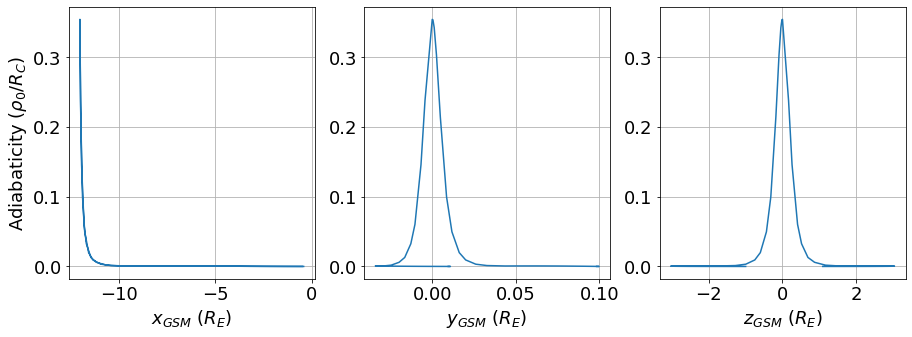

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(rr[:, 0] / Re, adp)
plt.xlabel(r'$x_{GSM}$ ($R_E$)')
plt.ylabel(r'Adiabaticity ($\rho_0/R_C$)')
plt.grid()

plt.subplot(132)
plt.plot(rr[:, 1] / Re, adp)
plt.xlabel(r'$y_{GSM}$ ($R_E$)')
plt.grid()

plt.subplot(133)
plt.plot(rr[:, 2] / Re, adp)
plt.xlabel(r'$z_{GSM}$ ($R_E$)')
plt.grid()

plt.show()